<a href="https://colab.research.google.com/github/nou321/PFE_Nour/blob/main/CnnAug_Test_64%2C64.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import classification_report


## 1- importer les bibliothéques

In [2]:
import os
from PIL import Image
import numpy as np 
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import shutil
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, recall_score, precision_score

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, BatchNormalization
from keras.backend import dropout
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.optimizers import Adam

## 2- fixer les path des données augmenter 

In [3]:

from google.colab import drive
drive.mount('/content/drive')
sj_fliped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped'
sj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_zoom'
sj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_rotation'
sj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_translation'
sj_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_distortion'
sj_rot_trans_flip='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped_rotation_translation'
sj_flip_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_fliped_distortion'
sj_rot_tran='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/sj_aug/sj_rotation_translation'

nsj_fliped='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped'
nsj_zoom='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_zoom'
nsj_rotation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_rotation'
nsj_translation='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_translation'
nsj_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_distortion'
nsj_rot_trans_flip='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped_rotation_translation'
nsj_flip_distortion='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_fliped_distortion'
nsj_rot_tran='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/Data_aug/nsj_aug/nsj_rotation_translation'

Mounted at /content/drive


In [5]:
sj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/sj'
nsj_path='/content/drive/MyDrive/Colab Notebooks/Pfe/3 HarmonicSS benchmark dataset/nsj'

## Mise en Forme des images

In [6]:

def mise_tenseur (path, nl, nc,pl):
    images_liste = os.listdir(path)
    images_liste.sort()
    Nb_images = len(images_liste)
    tenseur = np.empty((Nb_images, nl, nc, pl), dtype=np.uint8)
    k = 0
    for im in images_liste:
       
        img = imread(path+'/'+im)
        tenseur[k, :, :, 0] = img
        k +=1
    return(tenseur)

In [7]:
sj_original=mise_tenseur(sj_path,64,64,1)
nsj_original=mise_tenseur(nsj_path,64,64,1)

In [8]:
flipped_data= mise_tenseur(sj_fliped, 64, 64,1)
zoom_data=mise_tenseur(sj_zoom,64,64,1)
rotate_data=mise_tenseur(sj_rotation,64,64,1)
translate_data=mise_tenseur(sj_translation,64,64,1)
distortion_data=mise_tenseur(sj_distortion,64,64,1)
flip_dist_data=mise_tenseur(sj_flip_distortion,64,64,1)
rot_trans_flip_data=mise_tenseur(sj_rot_trans_flip,64,64,1)
rot_tran=mise_tenseur(sj_rot_tran,64,64,1)


In [9]:
sj_data = []
sj_data.extend(rotate_data)
sj_data.extend(flipped_data)
sj_data.extend(zoom_data)
sj_data.extend(translate_data)
sj_data.extend(distortion_data)
sj_data.extend(rot_trans_flip_data)
sj_data.extend(flip_dist_data)
sj_data.extend(rot_tran)

In [10]:
len(sj_data)

1955

In [11]:
flipped_data_nsj= mise_tenseur(nsj_fliped, 64, 64,1)
zoom_data_nsj=mise_tenseur(nsj_zoom,64,64,1)
rotate_data_nsj=mise_tenseur(nsj_rotation,64,64,1)
translate_data_nsj=mise_tenseur(nsj_translation,64,64,1)
distortion_data_nsj=mise_tenseur(nsj_distortion,64,64,1)
flip_dist_data_nsj=mise_tenseur(nsj_flip_distortion,64,64,1)
rot_trans_flip_data_nsj=mise_tenseur(nsj_rot_trans_flip,64,64,1)
rot_tran_nsj=mise_tenseur(nsj_rot_tran,64,64,1)


In [12]:
nsj_data = []
nsj_data.extend(rotate_data_nsj)
nsj_data.extend(flipped_data_nsj)
nsj_data.extend(rot_trans_flip_data_nsj)
nsj_data.extend(zoom_data_nsj)
nsj_data.extend(distortion_data_nsj)
nsj_data.extend(translate_data_nsj)
nsj_data.extend(flip_dist_data_nsj)
nsj_data.extend(rot_tran_nsj)
len(nsj_data)

1980

In [13]:
labels1 = [0] * len(nsj_data)  # labels pour la première classe (0)
labels2 = [1] * len(sj_data)  # labels pour la deuxième classe (1)

# Fusionner les données et les labels en un seul tableau multidimensionnel
data = np.concatenate([nsj_data, sj_data])
print(len(data))
labels = np.concatenate([labels1, labels2])
len(labels)


3935


3935

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
# normaliser les données 
x_train = x_train.reshape(x_train.shape[0], 64,64, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 64,64, 1).astype('float32') / 255

# cnn

In [15]:
model = Sequential()
model.add(Conv2D(32,(11,11),padding='same',activation='relu', input_shape = (64,64,1)))

model.add(Conv2D(32, kernel_size = (7,7),padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32,padding='same', kernel_size = (7,7),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        3904      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        50208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        50208     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0

In [16]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss=tf.keras.losses.binary_crossentropy,
              metrics=['accuracy',keras.metrics.Recall(),keras.metrics.Precision()])

In [18]:
H2 = model.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
99/99 [==============================] - 15s 29ms/step - loss: 0.6607 - accuracy: 0.6010 - recall: 0.6863 - precision: 0.5840 - val_loss: 0.5996 - val_accuracy: 0.6938 - val_recall: 0.5590 - val_precision: 0.7596
Epoch 2/100
99/99 [==============================] - 2s 16ms/step - loss: 0.5945 - accuracy: 0.6852 - recall: 0.6396 - precision: 0.7010 - val_loss: 0.5600 - val_accuracy: 0.7027 - val_recall: 0.7795 - val_precision: 0.6726
Epoch 3/100
99/99 [==============================] - 2s 17ms/step - loss: 0.5449 - accuracy: 0.7274 - recall: 0.6895 - precision: 0.7436 - val_loss: 0.5179 - val_accuracy: 0.7382 - val_recall: 0.7282 - val_precision: 0.7396
Epoch 4/100
99/99 [==============================] - 2s 19ms/step - loss: 0.5171 - accuracy: 0.7376 - recall: 0.6946 - precision: 0.7575 - val_loss: 0.5029 - val_accuracy: 0.7535 - val_recall: 0.6359 - val_precision: 0.8267
Epoch 5/100
99/99 [==============================] - 2s 16ms/step - loss: 0.4938 - accuracy: 0.7576 - r

## Matrice de confusion de train


25/25 [==============================] - 0s 5ms/step


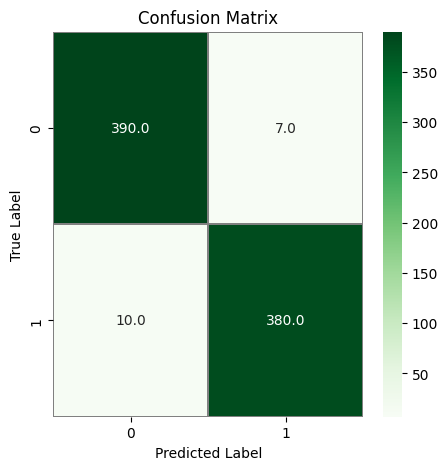

[[390   7]
 [ 10 380]]


In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Générer des prédictions sur l'ensemble de test
y_pred = model.predict(x_test)
y_pred_classes = np.where(y_pred>0.5,1.,0)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true=y_test, y_pred=y_pred_classes)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print(cm)

In [ ]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       397
           1       0.98      0.97      0.98       390

    accuracy                           0.98       787
   macro avg       0.98      0.98      0.98       787
weighted avg       0.98      0.98      0.98       787



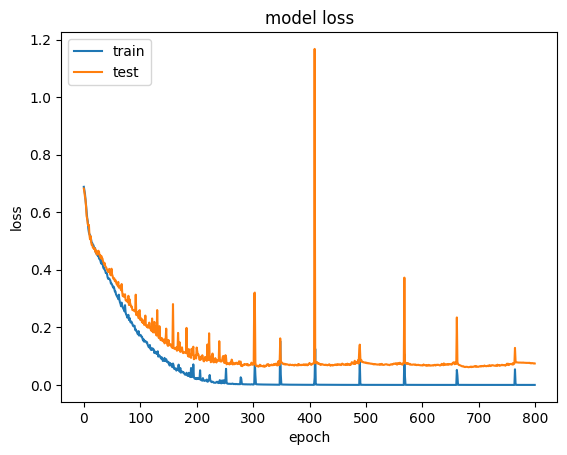

In [ ]:
#loss
plt.plot(H2.history['loss'])
plt.plot(H2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Matrice de confusion de test


In [20]:
# diviser la base en 2
nsj_org_data=nsj_original
sj_org_data=sj_original
label_nsj = [0] * len(nsj_org_data)  # labels pour la première classe (0)
label_sj = [1] * len(sj_org_data)  # labels pour la deuxième classe (1)
# Fusionner les données et les labels en un seul tableau multidimensionnel
data2 = np.concatenate([nsj_org_data, sj_org_data])
print(len(data2))
labels2 = np.concatenate([label_nsj, label_sj])
len(labels2)




225


225

In [23]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(data2, labels2, test_size=0.2, random_state=42)
# normaliser les données 
x_train2 = x_train2.reshape(x_train2.shape[0], 64,64, 1).astype('float32') / 255
x_test2= x_test2.reshape(x_test2.shape[0], 64,64, 1).astype('float32') / 255


2/2 [==============================] - 0s 6ms/step


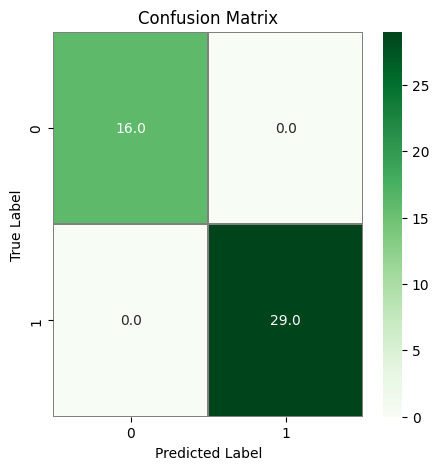

[[16  0]
 [ 0 29]]


In [24]:
y_pred = model.predict(x_test2)
y_pred_classes = np.where(y_pred>0.5,1.,0)

# Calculer la matrice de confusion
cm = confusion_matrix(y_true=y_test2, y_pred=y_pred_classes)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
print(cm)

In [28]:
print(classification_report(y_test2, y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        29

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# cross validation

In [32]:
# définir la fonction pour créer le modèle
def create_model():
    model3 = Sequential()
    model3.add(Conv2D(32,(11,11),padding='same',activation='relu', input_shape = (64,64,1)))
    model3.add(Conv2D(32, kernel_size = (7,7),padding='same',activation='relu'))
    model3.add(MaxPooling2D((2, 2)))
    model3.add(Conv2D(32,padding='same', kernel_size = (7,7),activation='relu'))
    model3.add(MaxPooling2D((2, 2)))
    model3.add(Flatten())
    model3.add(Dense(128,activation='relu'))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dense(32, activation='relu'))
    model3.add(Dense(16, activation='relu'))
    model3.add(Dense(1,activation='sigmoid'))
    model3.compile(optimizer='adam',
                  loss=tf.keras.losses.binary_crossentropy,
                  metrics=['accuracy',keras.metrics.Precision(),keras.metrics.Recall()])
    return model3

# créer le classifieur Keras
model4 = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# effectuer la validation croisée
scores = cross_val_score(model4,x_train,y_train, cv=7)

# afficher les résultats de la validation croisée
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

<ipython-input-32-c2f6de107372>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model4 = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=0)


Accuracy: 0.96 (+/- 0.01)


In [33]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_curve

In [34]:
# effectuer la prédiction de probabilité pour chaque exemple dans chaque fold
y_proba = cross_val_predict(model4, x_train, y_train, cv=7, method='predict_proba')
# calculer la précision et le rappel pour chaque fold
precisions, recalls, thresholds = precision_recall_curve(y_train, y_proba[:, 1])

print("Precision: %0.2f (+/- %0.2f)" % (precisions.mean(), precisions.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recalls.mean(), recalls.std() * 2))

15/15 [==============================] - 0s 4ms/step
Precision: 0.73 (+/- 0.32)
Recall: 0.98 (+/- 0.10)


In [42]:
print("Precision: %0.2f (+/- %0.2f)" % (precisions.mean(), precisions.std() * 2))
print("Recall: %0.2f (+/- %0.2f)" % (recalls.mean(), recalls.std() * 2))

Precision: 0.73 (+/- 0.32)
Recall: 0.98 (+/- 0.10)
